In [1]:
# --- SHAP Explainability for Mortality Risk Model ---
import pandas as pd
import shap
import joblib
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

In [3]:
# ---- Load Model & Data ----
model_path = "C:/Users/Rand Sobczak Jr/_rts/mlops/mimiccds/real_mimic/output/rf_mortality_model.joblib"
X_path = "C:/Users/Rand Sobczak Jr/_rts/mlops/mimiccds/real_mimic/output/X_features.csv"

model = joblib.load(model_path)
X = pd.read_csv(X_path)



In [4]:
# ---- Subsample for speed ----
X_sample = X.sample(n=100, random_state=42)


In [5]:
# ---- SHAP Explainer ----
explainer = shap.Explainer(model)
shap_values = explainer(X_sample)


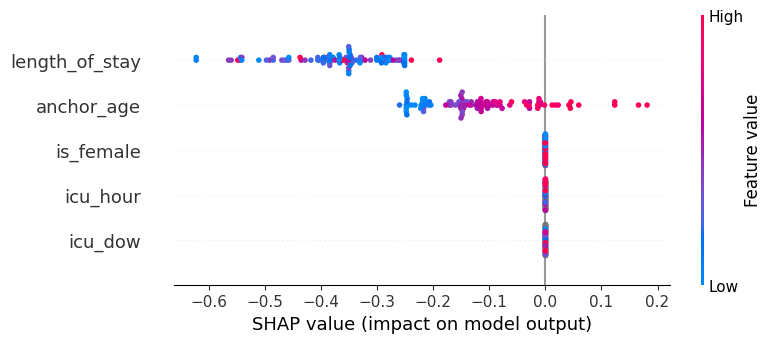

In [11]:
# Beeswarm plot for class 1 (e.g., mortality = 1)
shap.plots.beeswarm(shap_values[..., 1])

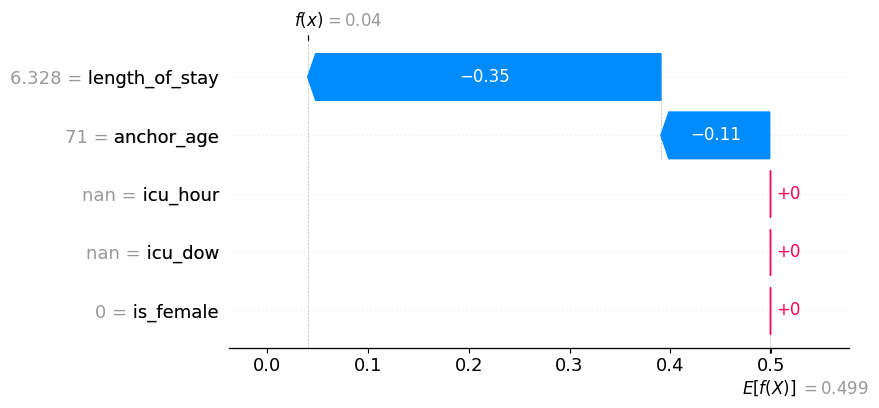

In [12]:
# Waterfall plot for sample 0 (e.g., first patient)
shap.plots.waterfall(shap_values[0, :, 1])

Summarizing the **mean absolute SHAP value** of each feature across all samples for class 1 (mortality within 30 days), helping us understand what the model learned overall.

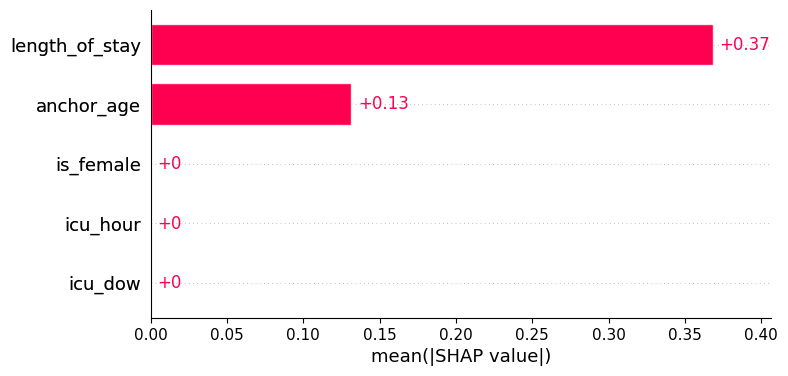

In [13]:
shap.plots.bar(shap_values[:, :, 1])

**Serializing the SHAP values**

In [ ]:
import joblib
shap_path = Path("_rts/mlops/mimiccds/real_mimic/output/shap_values_rf.joblib")
joblib.dump(shap_values, shap_path)